In [1]:
%matplotlib inline
import sys

sys.path.append('..')

In [2]:
import tools
import sqlite3
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [3]:
sns.set_style('whitegrid')
mpl.rcParams['axes.unicode_minus'] = False  # Otherwise the "-" don't render on PDF figures
mpl.rcParams.update({'font.size': 6})  # GRL figure font-size.
mpl.rcParams.update({'axes.titlesize': 'medium',
                     'axes.labelsize': 'medium',
                     'legend.fontsize': 'medium',
                     'xtick.labelsize': 'medium',
                     'ytick.labelsize': 'medium'})  # GRL figure font-size.

In [4]:
SHAPEFILE_PATH = '../data/huc250k_regions/huc250k_reg_reproj'
DB_PATH = '../data/stationdb.sqlite'
WESTOFLON = -104
EASTOFLON = -125

In [5]:
def find_gages(year_low, year_high = 2011):
    """Return latlon and ID for USGS gages with checked WY flows between year_low and year_high."""
    target_stations = tools.check_wy(DB_PATH, year_low, year_high, WESTOFLON, EASTOFLON)
    conn = sqlite3.connect(DB_PATH)
    sql_query = 'SELECT "STATION ID", LAT_GAGE, LONG_GAGE FROM StationInfo WHERE "STATION ID" IN ({seq}) ORDER BY "STATION ID" ASC'.format(seq = ",".join(["?"] * len(target_stations)))
    latlon = pd.read_sql(sql_query, conn, params = target_stations)
    conn.close()
    return latlon

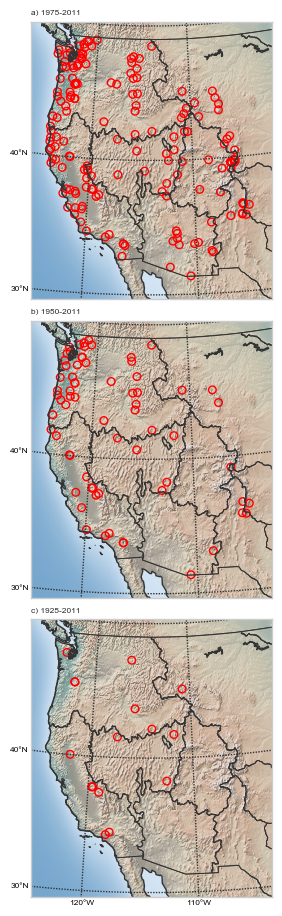

In [6]:
# Try to plot a 3 panel map that shows gage distribution from 1925-2011, 1950-2011, and 1975-2011.
dd = find_gages(1925)
fig = plt.figure(figsize = (3.74016, 9.05512))
ax = fig.add_subplot(313)
m = Basemap(width = 2000000, height = 2300000, 
            resolution = 'l', projection = 'stere', 
            lat_ts = 40.0, 
            lat_0 = 40.0, lon_0 = -114.0)
# m.drawmapboundary()
m.drawcoastlines(color = "#333333")
# m.drawstates(linewidth = 0.7, color = "#333333")
m.readshapefile(SHAPEFILE_PATH, 'huc250k', 
                linewidth = 0.7, color = "#333333")
m.drawcountries(color = "#333333")
m.shadedrelief()
parallels = np.arange(0., 81, 10)
m.drawparallels(parallels, labels = [True, False, False, False], color = "#333333")
meridians = np.arange(10., 351., 10)
m.drawmeridians(meridians, labels = [False, False, False, True], color = "#333333")
m.scatter(dd['LONG_GAGE'].as_matrix(), dd['LAT_GAGE'].as_matrix(), 
          s = 30, lw = 1, marker = 'o', 
          latlon = True, facecolors = "none", edgecolors='r')

ax.set_title('c) 1925-2011', loc = 'left')


dd = find_gages(1950)
ax = fig.add_subplot(312)
m = Basemap(width = 2000000, height = 2300000, 
            resolution = 'l', projection = 'stere', 
            lat_ts = 40.0, 
            lat_0 = 40.0, lon_0 = -114.0)
# m.drawmapboundary()
m.drawcoastlines(color = "#333333")
# m.drawstates(linewidth = 0.7, color = "#333333")
m.readshapefile(SHAPEFILE_PATH, 'huc250k', 
                linewidth = 0.7, color = "#333333")
m.drawcountries(color = "#333333")
m.shadedrelief()
parallels = np.arange(0., 81, 10)
m.drawparallels(parallels, labels = [True, False, False, False], color = "#333333")
meridians = np.arange(10., 351., 10)
m.drawmeridians(meridians, labels = [False, False, False, False], color = "#333333")
m.scatter(dd['LONG_GAGE'].as_matrix(), dd['LAT_GAGE'].as_matrix(), 
          s = 30, lw = 1, marker = 'o', 
          latlon = True, facecolors = "none", edgecolors='r')
ax.set_title('b) 1950-2011', loc = 'left')


dd = find_gages(1975)
ax = fig.add_subplot(311)
m = Basemap(width = 2000000, height = 2300000, 
            resolution = 'l', projection = 'stere', 
            lat_ts = 40.0, 
            lat_0 = 40.0, lon_0 = -114.0)
# m.drawmapboundary()
m.drawcoastlines(color = "#333333")
# m.drawstates(linewidth = 0.7, color = "#333333")
m.readshapefile(SHAPEFILE_PATH, 'huc250k', 
                linewidth = 0.7, color = "#333333")
m.drawcountries(color = "#333333")
m.shadedrelief()
parallels = np.arange(0., 81, 10)
m.drawparallels(parallels, labels = [True, False, False, False], color = "#333333")
meridians = np.arange(10., 351., 10)
m.drawmeridians(meridians, labels = [False, False, False, False], color = "#333333")
m.scatter(dd['LONG_GAGE'].as_matrix(), dd['LAT_GAGE'].as_matrix(), 
          s = 30, lw = 1, marker = 'o', 
          latlon = True, facecolors = "none", edgecolors='r')
ax.set_title('a) 1975-2011', loc = 'left')
fig.tight_layout()
plt.savefig("../plots/s3.pdf")